In [59]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
# Get compiled prices data
allprices_df=pd.read_csv('Output/AllPrices.csv')

In [3]:
allprices_df

,Unnamed: 0,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate
0,0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com
1,1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel
2,2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel
3,3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights
4,4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly
5,5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel
6,6,ATL,CHI,2018-10-02T01:42:33,589,2018-10-25,56.18,0,JustFly
7,7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork
8,8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights
9,9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork


In [6]:
# Store off departure dates as strings
ddates=list(allprices_df['Departure Date'])
ddates

['2018-10-30',
 '2018-10-23',
 '2018-10-09',
 '2018-10-24',
 '2018-10-09',
 '2018-10-18',
 '2018-10-25',
 '2019-01-03',
 '2018-10-28',
 '2018-10-12',
 '2018-10-30',
 '2018-10-11',
 '2018-12-30',
 '2018-12-17',
 '2018-10-19',
 '2018-10-09',
 '2018-10-11',
 '2018-10-11',
 '2018-10-24',
 '2018-11-02',
 '2018-12-07',
 '2018-12-14',
 '2018-11-02',
 '2018-12-02',
 '2018-12-24',
 '2018-10-16',
 '2018-12-14',
 '2018-10-13',
 '2018-10-11',
 '2018-10-12',
 '2019-02-07',
 '2018-10-06',
 '2019-02-20',
 '2018-11-30',
 '2018-11-06',
 '2018-11-02',
 '2018-10-09',
 '2018-10-20',
 '2018-11-10',
 '2018-10-10',
 '2018-12-09',
 '2018-10-26',
 '2018-10-11',
 '2018-10-18',
 '2018-10-14',
 '2018-10-04',
 '2018-12-08',
 '2018-12-11',
 '2018-10-22',
 '2018-10-11',
 '2018-10-13',
 '2018-10-13',
 '2018-10-05',
 '2019-03-29',
 '2018-12-29',
 '2018-12-11',
 '2018-11-25',
 '2019-03-20',
 '2018-10-04',
 '2018-12-18',
 '2018-10-07',
 '2018-10-05',
 '2018-10-04',
 '2018-10-31',
 '2018-12-21',
 '2018-10-13',
 '2018-10-

In [21]:
# Convert departure dates into years, months, and days
years=[]
months=[]
days=[]
for date in ddates:
    datelist=date.split('-')
    days.append(int(datelist[2]))
    months.append(int(datelist[1]))
    years.append(int(datelist[0]))

In [28]:
rows=len(years)
daysofweek=[]
for i in range(rows):
    dayofweek=datetime.datetime(years[i],months[i],days[i]).weekday()
    if dayofweek == 0:
        weekday='Monday'
    elif dayofweek == 1:
        weekday='Tuesday'
    elif dayofweek == 2:
        weekday='Wednesday'
    elif dayofweek == 3:
        weekday='Thursday'
    elif dayofweek == 4:
        weekday='Friday'
    elif dayofweek == 5:
        weekday='Saturday'
    elif dayofweek == 6:
        weekday='Sunday'
    daysofweek.append(weekday)

In [29]:
daysofweek

['Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Tuesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Sunday',
 'Friday',
 'Tuesday',
 'Thursday',
 'Sunday',
 'Monday',
 'Friday',
 'Tuesday',
 'Thursday',
 'Thursday',
 'Wednesday',
 'Friday',
 'Friday',
 'Friday',
 'Friday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Friday',
 'Saturday',
 'Thursday',
 'Friday',
 'Thursday',
 'Saturday',
 'Wednesday',
 'Friday',
 'Tuesday',
 'Friday',
 'Tuesday',
 'Saturday',
 'Saturday',
 'Wednesday',
 'Sunday',
 'Friday',
 'Thursday',
 'Thursday',
 'Sunday',
 'Thursday',
 'Saturday',
 'Tuesday',
 'Monday',
 'Thursday',
 'Saturday',
 'Saturday',
 'Friday',
 'Friday',
 'Saturday',
 'Tuesday',
 'Sunday',
 'Wednesday',
 'Thursday',
 'Tuesday',
 'Sunday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Friday',
 'Saturday',
 'Friday',
 'Saturday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Friday',
 'Tuesday',
 'Friday',
 'Wednesday',
 'Monday',
 'Wednesday',
 'Saturday',
 'Saturday',
 'Tuesday',
 'Sunday',
 '

In [36]:
allprices_df['Weekday']=daysofweek
allprices_df=allprices_df.drop(columns='Unnamed: 0')
allprices_df

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Weekday
0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com,Tuesday
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,Tuesday
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,Tuesday
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,Wednesday
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,Tuesday
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,Thursday
6,ATL,CHI,2018-10-02T01:42:33,589,2018-10-25,56.18,0,JustFly,Thursday
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,Thursday
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,Sunday
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,Friday


In [40]:
weekdaygroup=allprices_df.groupby('Weekday')
weekdayavgs=weekdaygroup.mean()
weekdaysems=weekdaygroup.sem()
weekdayindex=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
weekdayavgs=weekdayavgs.reindex(weekdayindex)
weekdaysems=weekdaysems.reindex(weekdayindex)
weekdayavgs

,Distance (Miles),Price (USD),Class
Weekday,,,
Sunday,2333.399262,299.224649,0.0
Monday,2715.982357,297.008538,0.0
Tuesday,2802.143738,275.044503,0.0
Wednesday,2975.369935,310.702114,0.0
Thursday,2870.268223,310.436760,0.0
Friday,2562.660819,316.795523,0.0
Saturday,2594.290634,306.508767,0.0


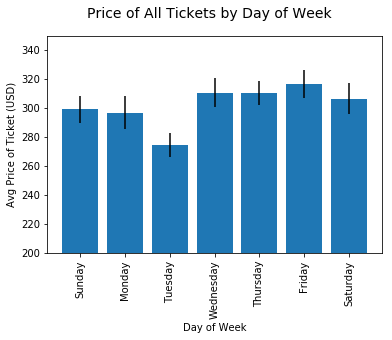

In [66]:
# Visualize ticket cost average
coords=range(7)

plt.bar(range(7),weekdayavgs['Price (USD)'],tick_label=weekdayindex,yerr=weekdaysems['Price (USD)'])
plt.xticks(range(7),rotation='vertical')
plt.ylabel('Avg Price of Ticket (USD)')
plt.ylim([200,350])
plt.xlabel('Day of Week')
plt.suptitle('Price of All Tickets by Day of Week', fontsize=14)

plt.savefig('Figures/Avg Price by Day of Week.png',bbox_inches='tight')

In [57]:
# Extract individual groups
Sundays = allprices_df[allprices_df["Weekday"] == weekdayindex[0]]["Price (USD)"]
Mondays = allprices_df[allprices_df["Weekday"] == weekdayindex[1]]["Price (USD)"]
Tuesdays = allprices_df[allprices_df["Weekday"] == weekdayindex[2]]["Price (USD)"]
Wednesdays = allprices_df[allprices_df["Weekday"] == weekdayindex[3]]["Price (USD)"]
Thursdays = allprices_df[allprices_df["Weekday"] == weekdayindex[4]]["Price (USD)"]
Fridays = allprices_df[allprices_df["Weekday"] == weekdayindex[5]]["Price (USD)"]
Saturdays = allprices_df[allprices_df["Weekday"] == weekdayindex[6]]["Price (USD)"]

In [60]:
# Perform the ANOVA
stats.f_oneway(Sundays,Mondays,Tuesdays,Wednesdays,Thursdays, Fridays,Saturdays)

F_onewayResult(statistic=2.0227115579548665, pvalue=0.05909082544261384)

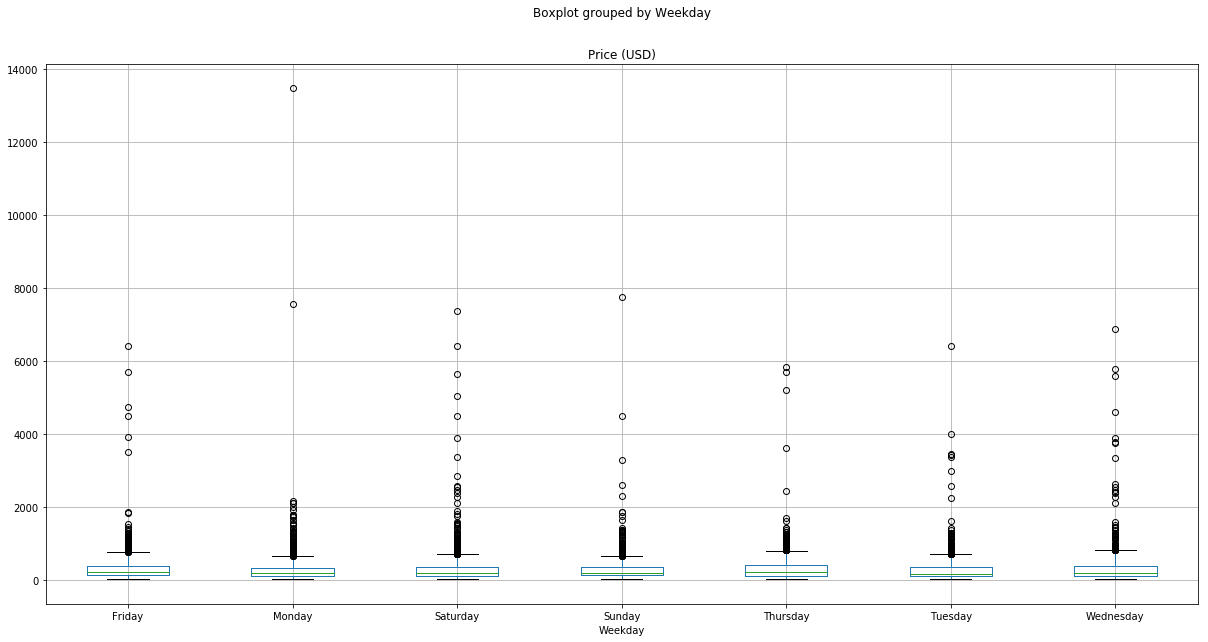

In [62]:
# Create a boxplot to compare means
allprices_df.boxplot("Price (USD)", by="Weekday", figsize=(20, 10))